# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import requests
import random
import json
import csv
import time
import folium
from folium import Map, CircleMarker, Vega, Popup, Marker
from folium.plugins import MarkerCluster, HeatMap
from math import radians, sin, cos, asin, sqrt
from ipywidgets import interact

# Data

## Originals

In [2]:
data_senior = pd.read_csv('raw_data/senior_transportation.csv')
data_bus = pd.read_csv('raw_data/bus_routes.csv')
data_users = pd.read_csv('raw_data/churn_users.csv')
data_od = pd.read_csv('raw_data/churn_OD.csv')


In [3]:
data_senior

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.647248
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.203075
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.606014
...,...,...,...,...,...
121048,1223824210,R1 - AM Lisboa,Setúbal,Barreiro,1877.243984
121049,1223824210,R1 - AM Lisboa,Setúbal,Palmela,505.273329
121050,1223824211,R1 - AM Lisboa,Setúbal,Palmela,505.273329
121051,1223824211,R1 - AM Lisboa,Setúbal,Barreiro,961.962684


In [4]:
data_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121053 entries, 0 to 121052
Data columns (total 5 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   linkid                                     121053 non-null  int64  
 1   Region_of_Origin                           121053 non-null  object 
 2   District_of_Origin                         121053 non-null  object 
 3   County_of_Origin                           121053 non-null  object 
 4   Average_Daily_SeniorPopulation_Travelling  121053 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


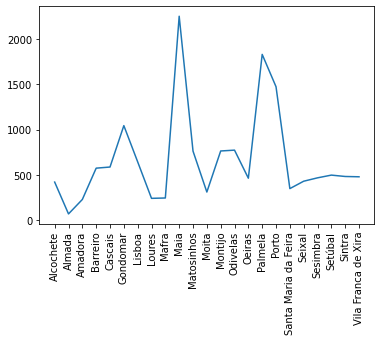

In [5]:
plot = data_senior[["County_of_Origin", "Average_Daily_SeniorPopulation_Travelling"]].groupby("County_of_Origin").mean()
plt.plot(plot)
plt.xticks(rotation='vertical')
plt.show()

In [6]:
data_bus

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
...,...,...
48307,166,1226896489
48308,166,1226896507
48309,166,1226896508
48310,166,1226896568


In [7]:
data_users

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092
...,...,...,...,...,...,...,...
539,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,15-24,4452.188395
540,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,25-34,363.461965
541,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,35-44,214.023515
542,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,45-54,1443.335763


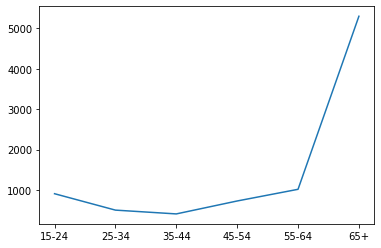

In [8]:
plt.plot(data_users.groupby("AgeClassDescription").mean())

In [9]:
data_od

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341
...,...,...,...,...,...,...,...,...
2248,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150315,0.000000
2249,R2 - AM Porto,Porto,Vila Nova de Gaia,R2 - AM Porto,PORTO,GONDOMAR,130414,0.000000
2250,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,LISBOA,ODIVELAS,111608,0.000000
2251,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150313,0.000000


## Transporlis : Carretas

In [10]:
df_carr = pd.read_csv("transporlis_data/data_carristur/shapes.txt")

In [11]:
df_carr

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,21635,38.705920,-9.144050,1,NaN
1,21635,38.709667,-9.136373,2,NaN
2,21635,38.713560,-9.138840,3,NaN
3,21635,38.715790,-9.141390,4,NaN
4,21635,38.719740,-9.145020,5,NaN
5,21635,38.727190,-9.148700,6,NaN
6,21635,38.730500,-9.146710,7,NaN
7,21635,38.733920,-9.144640,8,NaN
8,21635,38.742910,-9.146840,9,NaN
9,21635,38.746110,-9.147540,10,NaN


In [12]:
df_trips = pd.read_csv("transporlis_data/data_carristur/trips.txt")
df_trips

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,21635,25964425,25964425,NaN,NaN,NaN,21635
1,21636,25964426,25964426,NaN,NaN,NaN,21636
2,21637,25964427,25964427,NaN,NaN,NaN,21637
3,21638,25964428,25964428,NaN,NaN,NaN,21638


In [13]:
df_trips_carr = pd.merge(df_trips, df_carr[["shape_id", "shape_pt_lat", "shape_pt_lon"]], 
                         left_on="shape_id", right_on="shape_id")

In [14]:
df_trips_carr

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,shape_pt_lat,shape_pt_lon
0,21635,25964425,25964425,NaN,NaN,NaN,21635,38.705920,-9.144050
1,21635,25964425,25964425,NaN,NaN,NaN,21635,38.709667,-9.136373
2,21635,25964425,25964425,NaN,NaN,NaN,21635,38.713560,-9.138840
3,21635,25964425,25964425,NaN,NaN,NaN,21635,38.715790,-9.141390
4,21635,25964425,25964425,NaN,NaN,NaN,21635,38.719740,-9.145020
5,21635,25964425,25964425,NaN,NaN,NaN,21635,38.727190,-9.148700
6,21635,25964425,25964425,NaN,NaN,NaN,21635,38.730500,-9.146710
7,21635,25964425,25964425,NaN,NaN,NaN,21635,38.733920,-9.144640
8,21635,25964425,25964425,NaN,NaN,NaN,21635,38.742910,-9.146840
9,21635,25964425,25964425,NaN,NaN,NaN,21635,38.746110,-9.147540


In [15]:
df_freq = pd.read_csv("transporlis_data/data_carristur/frequencies.txt")
df_freq

,trip_id,start_time,end_time,headway_secs,exact_times
0,25964425,08:00:00,21:00:00,1200,1
1,25964426,08:00:00,21:00:00,1200,1
2,25964427,08:00:00,19:00:00,3600,1
3,25964428,08:30:00,19:30:00,3600,1


In [16]:
df_freq.value_counts()

trip_id   start_time  end_time  headway_secs  exact_times
25964425  08:00:00    21:00:00  1200          1              1
25964426  08:00:00    21:00:00  1200          1              1
25964427  08:00:00    19:00:00  3600          1              1
25964428  08:30:00    19:30:00  3600          1              1
dtype: int64

### Mapping

In [17]:
# map for transporlis
m = folium.Map(location=[38.71, -9.18])
    # Avoid preloading all points
# marker_cluster = MarkerCluster().add_to(m)
for c, row in df_trips_carr.iterrows():
    coor = list([row["shape_pt_lat"], row["shape_pt_lon"]])
    popup = f'Route ID: {int(row["route_id"])}'
    tooltip = f'Trip ID: {int(row["trip_id"])}'
#     print(popup)
    Marker(coor, popup=popup, tooltip=tooltip).add_to(m)

m

In [18]:
# map for seniors table
m = folium.Map(location=[38.71, -9.18])
    # Avoid preloading all points
# marker_cluster = MarkerCluster().add_to(m)
for c, row in df_trips_carr.iterrows():
    coor = list([row["shape_pt_lat"], row["shape_pt_lon"]])
    popup = f'Route ID: {int(row["route_id"])}'
    tooltip = f'Trip ID: {int(row["trip_id"])}'
#     print(popup)
    Marker(coor, popup=popup, tooltip=tooltip).add_to(m)

m

## Transporlis : Carris

In [19]:
df_carris_shapes = pd.read_csv("transporlis_data/data_carris/shapes.txt")
df_carris_shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,160134,38.745576,-9.135208,1,NaN
1,160134,38.743412,-9.132416,2,NaN
2,160134,38.745694,-9.131128,3,NaN
3,160134,38.749600,-9.130750,4,NaN
4,160134,38.752600,-9.130460,5,NaN
...,...,...,...,...,...
8781,193115,38.756616,-9.103018,38,NaN
8782,193115,38.759500,-9.103320,39,NaN
8783,193115,38.763674,-9.103671,40,NaN
8784,193115,38.766835,-9.104004,41,NaN


In [20]:
df_carris_trips = pd.read_csv("transporlis_data/data_carris/trips.txt")
df_carris_trips

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,160134,27581474,27581474,NaN,NaN,NaN,160134
1,160134,27581484,27581484,NaN,NaN,NaN,160134
2,160134,27581489,27581489,NaN,NaN,NaN,160134
3,160134,27581544,27581544,NaN,NaN,NaN,160134
4,160134,27581494,27581494,NaN,NaN,NaN,160134
...,...,...,...,...,...,...,...
12679,193115,27592493,27592493,NaN,NaN,NaN,193115
12680,193115,27592971,27592971,NaN,NaN,NaN,193115
12681,193115,27592796,27592796,NaN,NaN,NaN,193115
12682,193115,27593132,27593132,NaN,NaN,NaN,193115


In [28]:
df_carris_shapes_trips = pd.merge(df_carris_trips, df_carris_shapes[["shape_id", "shape_pt_lat", "shape_pt_lon"]], 
                         left_on="shape_id", right_on="shape_id")

In [29]:
df_carris_shapes_trips

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,shape_pt_lat,shape_pt_lon
0,160134,27581474,27581474,NaN,NaN,NaN,160134,38.745576,-9.135208
1,160134,27581474,27581474,NaN,NaN,NaN,160134,38.743412,-9.132416
2,160134,27581474,27581474,NaN,NaN,NaN,160134,38.745694,-9.131128
3,160134,27581474,27581474,NaN,NaN,NaN,160134,38.749600,-9.130750
4,160134,27581474,27581474,NaN,NaN,NaN,160134,38.752600,-9.130460
...,...,...,...,...,...,...,...,...,...
382642,193115,27593096,27593096,NaN,NaN,NaN,193115,38.756616,-9.103018
382643,193115,27593096,27593096,NaN,NaN,NaN,193115,38.759500,-9.103320
382644,193115,27593096,27593096,NaN,NaN,NaN,193115,38.763674,-9.103671
382645,193115,27593096,27593096,NaN,NaN,NaN,193115,38.766835,-9.104004


In [23]:
df_carris_freq = pd.read_csv("transporlis_data/data_carristur/frequencies.txt")
df_freq

,trip_id,start_time,end_time,headway_secs,exact_times
0,25964425,08:00:00,21:00:00,1200,1
1,25964426,08:00:00,21:00:00,1200,1
2,25964427,08:00:00,19:00:00,3600,1
3,25964428,08:30:00,19:30:00,3600,1


### Mapping

In [24]:
# map for seniors table
m = folium.Map(location=[38.71, -9.18])
    # Avoid preloading all points
# marker_cluster = MarkerCluster().add_to(m)
for c, row in df_carris_shapes_trips.iterrows():
    coor = list([row["shape_pt_lat"], row["shape_pt_lon"]])
    popup = f'Route ID: {int(row["route_id"])}'
    tooltip = f'Trip ID: {int(row["trip_id"])}'
#     print(popup)
    Marker(coor, popup=popup, tooltip=tooltip).add_to(m)

m

KeyboardInterrupt: 